In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
!ls ../data

chronom_test.csv   gas_test.csv   plavki_test.csv   sample_submission.csv
chronom_train.csv  gas_train.csv  plavki_train.csv  sip_test.csv
chugun_test.csv    lom_test.csv   produv_test.csv   sip_train.csv
chugun_train.csv   lom_train.csv  produv_train.csv  target_train.csv


# Target

In [4]:
target_train = pd.read_csv("../data/target_train.csv")

In [5]:
target_train

,NPLV,TST,C
0,510008,1690,0.060
1,510009,1683,0.097
2,510010,1662,0.091
3,510011,1609,0.410
4,510012,1682,0.120
...,...,...,...
2058,512318,1626,0.145
2059,512319,1643,0.087
2060,512320,1615,0.141
2061,512321,1654,0.270


# Plavki

In [6]:
plavki_train = pd.read_csv("../data/plavki_train.csv")
plavki_test = pd.read_csv("../data/plavki_test.csv")

In [8]:
plavki_train["NPLV"].value_counts()

511135    75
510008     1
511544     1
511558     1
511557     1
          ..
510773     1
510772     1
510771     1
510770     1
512322     1
Name: NPLV, Length: 2063, dtype: int64

In [14]:
cols = plavki_train.columns[1:]

In [15]:
for col in cols:
    print(col)
    print(plavki_train.set_index("NPLV").loc[511135][col].nunique())

plavka_VR_NACH
1
plavka_VR_KON
1
plavka_NMZ
1
plavka_NAPR_ZAD
1
plavka_STFUT
1
plavka_TIPE_FUR
1
plavka_ST_FURM
75
plavka_TIPE_GOL
1
plavka_ST_GOL
75


In [11]:
plavki_test["NPLV"].value_counts()

512324    1
513069    1
513028    1
513029    1
513030    1
         ..
512678    1
512679    1
512680    1
512681    1
513374    1
Name: NPLV, Length: 780, dtype: int64

In [44]:
plavki_fixed = plavki_train.groupby("NPLV").first()

In [46]:
plavki_fixed.shape

(2063, 9)

In [47]:
dates = pd.to_datetime(plavki_fixed["plavka_VR_NACH"]).dt.date

<AxesSubplot:ylabel='plavka_VR_NACH'>

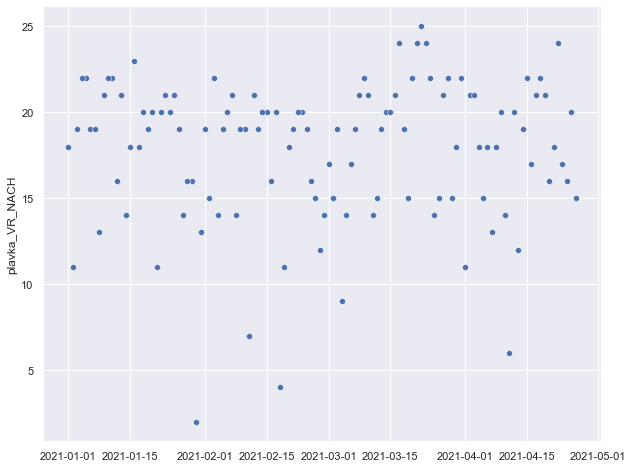

In [48]:
plt.figure(figsize=(10, 8))
sns.scatterplot(x=dates.value_counts().index, y=dates.value_counts())

In [79]:
pd.to_datetime(plavki_fixed["plavka_VR_NACH"]).dt.date.nunique()

116

In [81]:
pd.to_datetime(plavki_fixed["plavka_VR_NACH"]).max() - pd.to_datetime(plavki_fixed["plavka_VR_NACH"]).min()

Timedelta('115 days 14:19:49')

Каждый день выплавляют!

<AxesSubplot:>

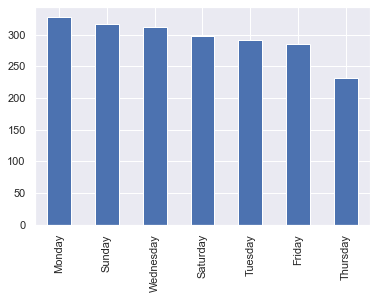

In [63]:
pd.to_datetime(plavki_fixed["plavka_VR_NACH"]).dt.day_name().value_counts().plot(kind="bar")

In [65]:
durations = pd.to_datetime(plavki_fixed["plavka_VR_KON"]) - pd.to_datetime(plavki_fixed["plavka_VR_NACH"])

<AxesSubplot:ylabel='Frequency'>

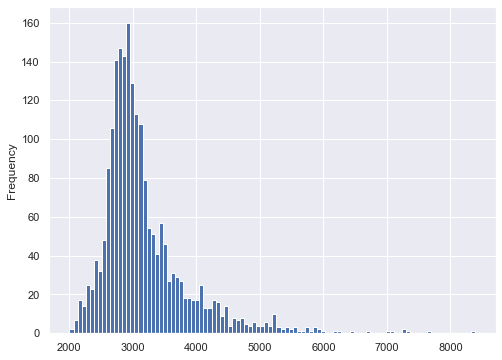

In [75]:
plt.figure(figsize=(8, 6))
durations.astype('timedelta64[s]').plot.hist(bins=100)

In [89]:
plavki_fixed["plavka_NMZ"].value_counts()

Ст3пс/Э            304
C071TM.z01/ЭТ      190
SC2/ЭТ             184
SC2M/ЭТ            169
SPHC.z03/ЭТ        125
                  ... 
26С2.2               1
Ст3Гпс               1
09Г2С.18             1
Ст1пс/Э              1
GR60.z02/ЭТ          1
Name: plavka_NMZ, Length: 66, dtype: int64

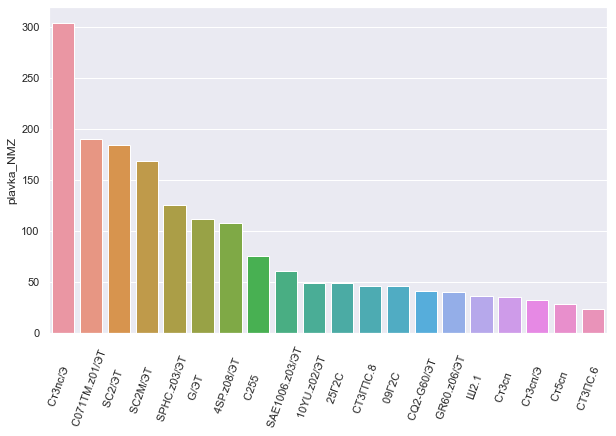

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x=plavki_fixed["plavka_NMZ"].value_counts().index[:20], y=plavki_fixed["plavka_NMZ"].value_counts()[:20])
plt.xticks(rotation=70);

In [98]:
plavki_fixed["plavka_NAPR_ZAD"].value_counts()

МНЛС    942
МНЛЗ    564
Изл     557
Name: plavka_NAPR_ZAD, dtype: int64

/home/data_sapiens/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='plavka_NAPR_ZAD', ylabel='count'>

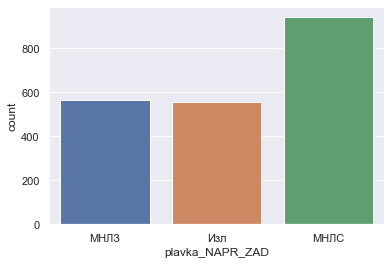

In [99]:
sns.countplot(plavki_fixed["plavka_NAPR_ZAD"])

<AxesSubplot:xlabel='plavka_STFUT', ylabel='Count'>

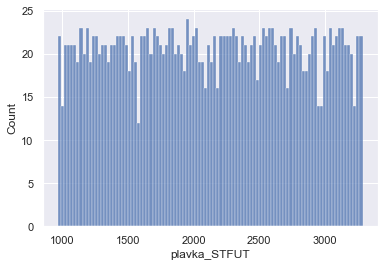

In [103]:
sns.histplot(plavki_fixed["plavka_STFUT"], bins=100)

/home/data_sapiens/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='plavka_TIPE_FUR', ylabel='count'>

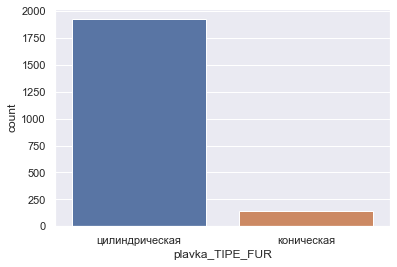

In [106]:
sns.countplot(plavki_fixed["plavka_TIPE_FUR"])

<AxesSubplot:xlabel='plavka_ST_FURM', ylabel='Count'>

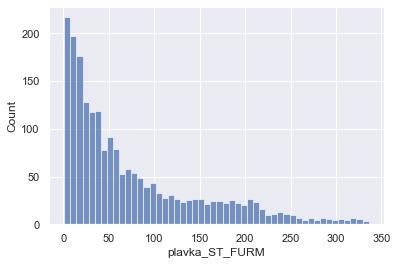

In [114]:
sns.histplot(plavki_fixed["plavka_ST_FURM"], bins=50)

/home/data_sapiens/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='plavka_TIPE_GOL', ylabel='count'>

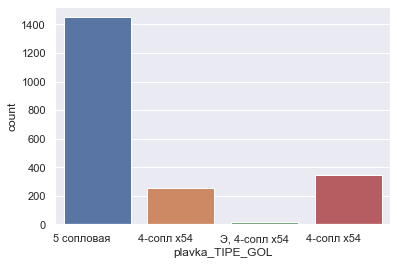

In [111]:
sns.countplot(plavki_fixed["plavka_TIPE_GOL"])

<AxesSubplot:xlabel='plavka_ST_GOL', ylabel='Count'>

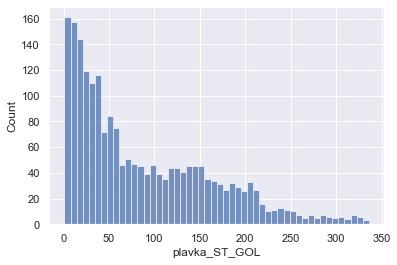

In [116]:
sns.histplot(plavki_fixed["plavka_ST_GOL"], bins=50)

/home/data_sapiens/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='plavka_ST_FURM', ylabel='plavka_ST_GOL'>

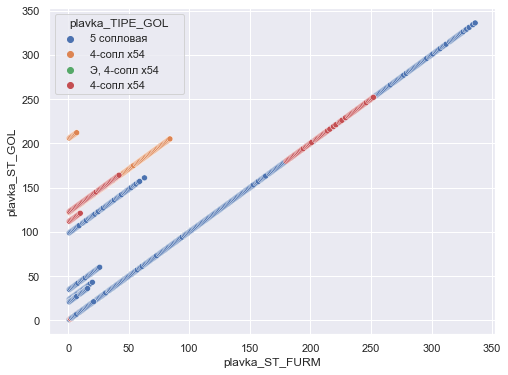

In [121]:
plt.figure(figsize=(8, 6))
sns.scatterplot(plavki_fixed["plavka_ST_FURM"], plavki_fixed["plavka_ST_GOL"], hue=plavki_fixed["plavka_TIPE_GOL"])

/home/data_sapiens/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='plavka_ST_FURM', ylabel='plavka_ST_GOL'>

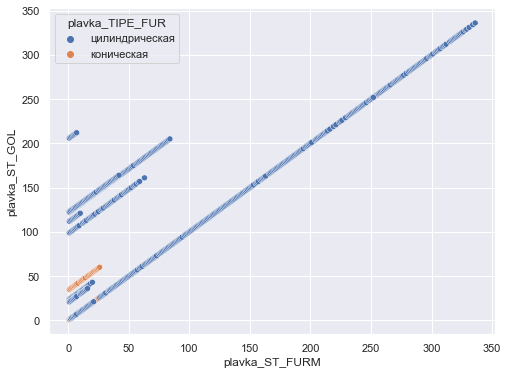

In [123]:
plt.figure(figsize=(8, 6))
sns.scatterplot(plavki_fixed["plavka_ST_FURM"], plavki_fixed["plavka_ST_GOL"], hue=plavki_fixed["plavka_TIPE_FUR"])

Ммм кайф

/home/data_sapiens/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='plavka_ST_FURM', ylabel='plavka_ST_GOL'>

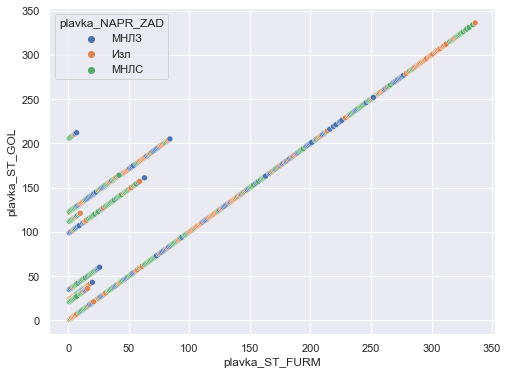

In [124]:
plt.figure(figsize=(8, 6))
sns.scatterplot(plavki_fixed["plavka_ST_FURM"], plavki_fixed["plavka_ST_GOL"], hue=plavki_fixed["plavka_NAPR_ZAD"])

In [127]:
plavki_fixed

,plavka_VR_NACH,plavka_VR_KON,plavka_NMZ,plavka_NAPR_ZAD,plavka_STFUT,plavka_TIPE_FUR,plavka_ST_FURM,plavka_TIPE_GOL,plavka_ST_GOL
NPLV,,,,,,,,,
510008,2021-01-01 03:08:11,2021-01-01 03:51:10,С255,МНЛЗ,971,цилиндрическая,11,5 сопловая,11
510009,2021-01-01 04:00:44,2021-01-01 05:07:28,С255,МНЛЗ,972,цилиндрическая,12,5 сопловая,12
510010,2021-01-01 05:12:29,2021-01-01 06:00:53,Ст3пс/Э,Изл,973,цилиндрическая,13,5 сопловая,13
510011,2021-01-01 06:13:48,2021-01-01 07:08:39,Св-08А.z02,Изл,974,цилиндрическая,14,5 сопловая,14
510012,2021-01-01 07:13:44,2021-01-01 08:01:59,SC2M/ЭТ,МНЛС,975,цилиндрическая,15,5 сопловая,15
...,...,...,...,...,...,...,...,...,...
512318,2021-04-26 13:04:26,2021-04-26 13:55:50,C071TM.z01/ЭТ,МНЛС,3281,коническая,22,5 сопловая,56
512319,2021-04-26 14:10:20,2021-04-26 15:14:23,C071TM.z01/ЭТ,МНЛС,3282,коническая,23,5 сопловая,57
512320,2021-04-26 15:21:37,2021-04-26 16:16:42,40Х.1,МНЛЗ,3283,коническая,24,5 сопловая,58


In [130]:
wt = plavki_fixed.join(target_train.set_index("NPLV"), on="NPLV")

/home/data_sapiens/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='plavka_VR_NACH', ylabel='TST'>

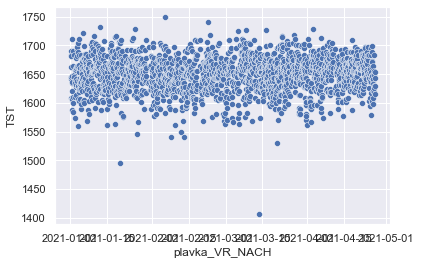

In [132]:
sns.scatterplot(pd.to_datetime(wt["plavka_VR_NACH"]), wt["TST"])

/home/data_sapiens/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='plavka_VR_NACH', ylabel='C'>

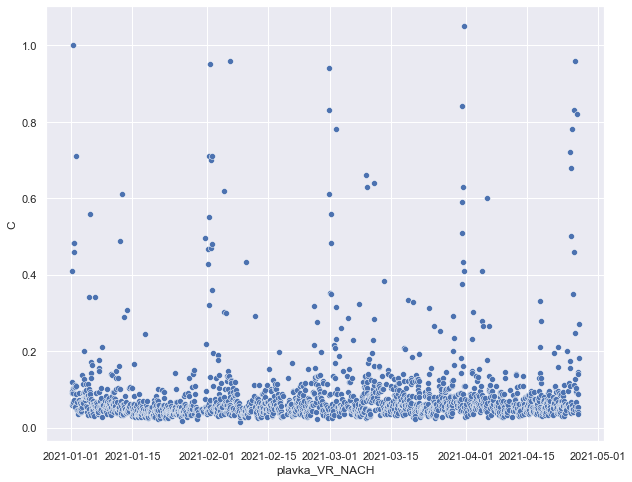

In [136]:
plt.figure(figsize=(10, 8))
sns.scatterplot(pd.to_datetime(wt["plavka_VR_NACH"]), wt["C"])

# Chronom

In [43]:
chronom_train = pd.read_csv("../data/chronom_train.csv")
chronom_test = pd.read_csv("../data/chronom_test.csv")

In [42]:
chronom_train[""]

,Unnamed: 0,NPLV,TYPE_OPER,NOP,VR_NACH,VR_KON,O2
0,35171,510008,межпл.прост.,межпл. простой,2011-01-01 10:28:13,2011-01-01 10:32:15,NaN
1,35162,510008,межпл.прост.,межпл. простой,2021-01-01 03:01:07,2021-01-01 03:08:11,NaN
2,35163,510008,межпл.прост.,Осмотр конвертера,2021-01-01 03:01:19,2021-01-01 03:03:43,NaN
3,35164,510008,межпл.прост.,Наведение гарнисажа,2021-01-01 03:03:43,2021-01-01 03:05:23,NaN
4,35165,510008,межпл.прост.,Слив шлака,2021-01-01 03:05:23,2021-01-01 03:06:09,NaN
...,...,...,...,...,...,...,...
34401,20943,512322,опер,Повалка,2021-04-26 18:31:26,2021-04-26 18:41:10,NaN
34402,20944,512322,опер,Выпуск металла,2021-04-26 18:41:10,2021-04-26 18:47:40,NaN
34403,20945,512322,опер,Отсечка шлака,2021-04-26 18:46:15,2021-04-26 18:46:15,NaN
34404,20946,512322,опер,Прерыв. выпуска,2021-04-26 18:47:40,2021-04-26 18:48:40,NaN
